# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment you will be able to :

* Understand Fashion-MNIST dataset
* Classify Fashion-MNIST data using neural networks


In [1]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/3March/fashion_mnist_with_pytorch.mp4" type="video/mp4">
</video>
""")

## Dataset

### History

The original MNIST dataset contains handwritten digits. People from AI/ML or Data Science community love this dataset. They use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset they would try on. As per popular belief, If the algorithm doesn’t work on MNIST, it won’t work at all. Well, if algorithm works on MNIST, it may still fail on other datasets.


As per the original [paper](https://arxiv.org/abs/1708.07747) describing about Fashion-MNIST, It is a dataset recomposed from the product pictures of Zalando’s websites. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

There are some good reasons for the challenges faced by MNIST dataset:

* MNIST is too easy - Neural networks can achieve 99.7% on MNIST easily, and similarly, even classic ML algorithms can achieve 97%. 

* MNIST is overused - Almost everyone who has experience with deep learning has come across MNIST at least once.

* MNIST cannot represent modern CV task





### Description

The dataset choosen for this experiment is Fashion-MNIST. The dataset is made up of 28x28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images and the test set has 10,000 images. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

**Labels / Classes**

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

## Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [19]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W2E21_Fashion-MNIST" #name of the notebook

def setup():
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install torchvision")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing the Required Packages

* First, we import pytorch, the deep learning library we’ll be using, and torchvision, which provides our dataset and image transformations. 

* We then explicitly import torchvision.transform and torchvision.datasets for convenience. 

* We also import torch.nn (pytorch’s neural network library), torch.nn.functional (includes non-linear functions like ReLu and sigmoid) and torch.optim (implementing various optimization algorithms).

In [0]:
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [0]:
import matplotlib.pyplot as plt

### Preparing the data

Now, 

* We will load both the training set and the testing sets 

* We will use  transform.compose() to convert the datasets into tensors using transforms.ToTensor(). We also normalize them by setting the mean and standard deviation using transforms.Normalize().



In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

In [0]:
# Downloading the Training set
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = True, transform=transform, download=True)

In [0]:
# Loading the downloaded training set
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=64)

In [0]:
# Downloading the testing set
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = False, transform=transform, download = True)

In [0]:
# Loading the downloaded testing set
testloader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=64)

The train and test data are provided via data loaders that provide iterators over the datasets.

The first element of training data (X_train) is a 4th-order tensor of size (batch_size, 1, 28, 28), i.e. it consists of a batch of images of size 1x28x28 pixels. y_train is a vector containing the correct classes ("0", "1", ..., "9") for each training image. Here batch size is 64.


In [35]:
len(trainloader)

938

In [29]:
for (X_train, y_train) in trainloader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor


### Plotting first 25 images

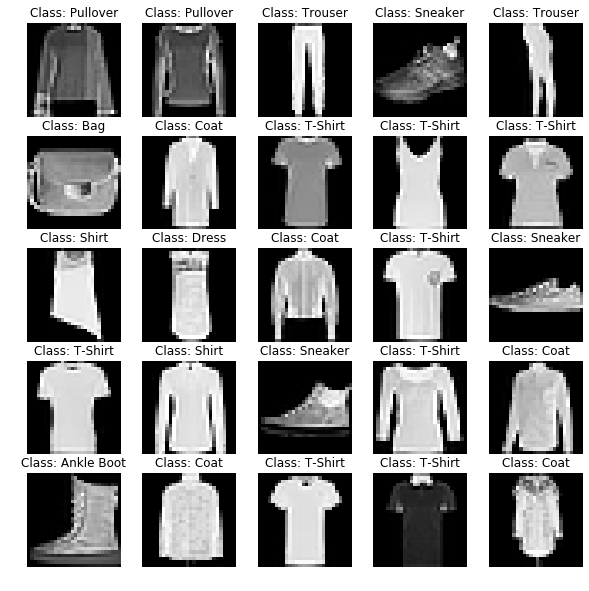

In [30]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
pltsize=1
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray")
    plt.title('Class: '+labels_map[int(str(y_train[i])[-2])])

Neural Networks are inherited from the nn.Module class.

Now let us define a neural network. Here we are using two functions \__init__ and forward function.

In the \__init__  function, we define the layers using the provided modules from the nn package. The forward function is called on the Neural Network for a set of inputs, and it passes that input through the different layers that have been defined. 

In this case, we pass input (X) through the first layer, pass it’s output through the Relu layer, pass it's output through second layer, pass it's output to the relu layer, pass it's output through the third layer, pass it's output to the relu layer and pass it's output through the log softmax layer.


In [0]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128,64)
        self.l4 = nn.Linear(64,10)
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.log_softmax(self.l4(x), dim=1)
        return x

#### Calling the instances of the network

In [0]:
model = Model()

#### Declaring the loss function and optimizer

In [0]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.005)

#### Training and Testing the model

In Training Phase, we iterate over a batch of images in the train_loader. For each batch, we perform  the following steps:

* First we zero out the gradients using zero_grad()

* We pass the data to the model i.e. we perform forward pass by calling the forward()

* We calculate the loss using the actual and predicted labels

* Perform Backward pass using backward() to update the weights

In Testing Phase, we iterate over a batch of images in the test_loader. For each batch we perform the following steps:

* We pass the images through the model (network) to get the outputs
* Pick the class / label with the highest probability
* Calculate the accuracy

In [34]:
epoch = 30

train_losses, test_losses = [],[]
## Training Phaseb
for e in range(epoch):
    train_loss = 0
    test_loss = 0
    accuracy = 0
    for images, labels in trainloader:
      '''The view function is used to reshape the size of the tensor. 
         If there is any situation that you don't know how many 
         rows you want but your sure of the number of columns, then
         inplace of them we use -1 '''
      images = images.view(-1, 28*28)
        # zero outing the gradients
      optimizer.zero_grad()
        # Passing the data to the model (Forward Pass)
      op = model(images)
        # Calculating the loss
      loss = criterion(op, labels)
      train_loss += loss.item()
        # Performing backward pass (Backpropagation)
      loss.backward()
      optimizer.step()
## Testing Phase
    else:
        with torch.no_grad():
        #Keeping the model(network) in evaluation mode
            model.eval()
            for images,labels in testloader:
                '''The view function is used to reshape the size of the tensor. 
                   If there is any situation that you don't know how many 
                   rows you want but your sure of the number of columns, then
                   inplace of them we use -1 '''
                images = images.view(-1, 28*28)
                # Passing images to the model, which return the probabilites as outputs
                log_ps = model(images)
                prob = torch.exp(log_ps)
                # Picking the class / label with maximum probability
                top_probs, top_classes = prob.topk(1, dim=1)
                equals = labels == top_classes.view(labels.shape)
                # Calculating the accuracy
                accuracy += equals.type(torch.FloatTensor).mean()
                # Calculating the loss
                test_loss += criterion(log_ps, labels)
        # Keeping the model(network) in training mode
        model.train()
    print("Epoch: {}/{}.. ".format(e+1, epoch),
              "Training Loss: {:.3f}.. ".format(train_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    train_losses.append(train_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
        

Epoch: 1/30..  Training Loss: 1.878..  Test Loss: 1.156..  Test Accuracy: 0.596
Epoch: 2/30..  Training Loss: 0.908..  Test Loss: 0.778..  Test Accuracy: 0.719
Epoch: 3/30..  Training Loss: 0.700..  Test Loss: 0.662..  Test Accuracy: 0.759
Epoch: 4/30..  Training Loss: 0.610..  Test Loss: 0.596..  Test Accuracy: 0.778
Epoch: 5/30..  Training Loss: 0.551..  Test Loss: 0.557..  Test Accuracy: 0.794
Epoch: 6/30..  Training Loss: 0.509..  Test Loss: 0.519..  Test Accuracy: 0.812
Epoch: 7/30..  Training Loss: 0.480..  Test Loss: 0.498..  Test Accuracy: 0.822
Epoch: 8/30..  Training Loss: 0.460..  Test Loss: 0.481..  Test Accuracy: 0.826
Epoch: 9/30..  Training Loss: 0.443..  Test Loss: 0.473..  Test Accuracy: 0.831
Epoch: 10/30..  Training Loss: 0.429..  Test Loss: 0.466..  Test Accuracy: 0.831
Epoch: 11/30..  Training Loss: 0.417..  Test Loss: 0.453..  Test Accuracy: 0.838
Epoch: 12/30..  Training Loss: 0.407..  Test Loss: 0.447..  Test Accuracy: 0.842
Epoch: 13/30..  Training Loss: 0.398.

#### Plotting the training and test losses

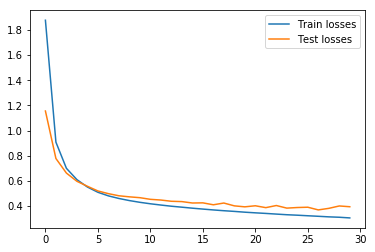

In [36]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

### Please answer the questions below to complete the experiment:

In [0]:
#@title During testing phase model is set torch.no_grad(), so that weights can continue being updated? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["TRUE","FALSE"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [43]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4531
Date of submission:  03 May 2019
Time of submission:  00:10:58
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
